In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e6/sample_submission.csv
/kaggle/input/playground-series-s5e6/train.csv
/kaggle/input/playground-series-s5e6/test.csv


In [2]:
import pandas as pd

df=pd.read_csv("/kaggle/input/playground-series-s5e6/sample_submission.csv")
df


,id,Fertilizer Name
0,750000,14-35-14 10-26-26 Urea
1,750001,14-35-14 10-26-26 Urea
2,750002,14-35-14 10-26-26 Urea
3,750003,14-35-14 10-26-26 Urea
4,750004,14-35-14 10-26-26 Urea
...,...,...
249995,999995,14-35-14 10-26-26 Urea
249996,999996,14-35-14 10-26-26 Urea
249997,999997,14-35-14 10-26-26 Urea
249998,999998,14-35-14 10-26-26 Urea


In [3]:
df=pd.read_csv("/kaggle/input/playground-series-s5e6/train.csv")
df

# X_train=df.drop("")

df=df.drop("id",axis=1)
df


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28
2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,35,58,43,Red,Paddy,37,2,16,DAP
...,...,...,...,...,...,...,...,...,...
749995,25,69,30,Clayey,Maize,8,16,6,28-28
749996,37,64,58,Loamy,Sugarcane,38,8,20,17-17-17
749997,35,68,59,Sandy,Ground Nuts,6,11,29,10-26-26
749998,31,68,29,Red,Cotton,9,11,12,20-20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      750000 non-null  int64 
 1   Humidity         750000 non-null  int64 
 2   Moisture         750000 non-null  int64 
 3   Soil Type        750000 non-null  object
 4   Crop Type        750000 non-null  object
 5   Nitrogen         750000 non-null  int64 
 6   Potassium        750000 non-null  int64 
 7   Phosphorous      750000 non-null  int64 
 8   Fertilizer Name  750000 non-null  object
dtypes: int64(6), object(3)
memory usage: 51.5+ MB


In [5]:
# df.drop("id",inplace=True)
X_train=df.drop("Fertilizer Name",axis=1)
y_train=df["Fertilizer Name"]

df=pd.read_csv("/kaggle/input/playground-series-s5e6/test.csv")
df

# X_test=df.drop("Fertilizer Name",axis=1)
# y_test=df["Fertilizer Name"]


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14
...,...,...,...,...,...,...,...,...,...
249995,999995,26,66,30,Red,Sugarcane,14,7,18
249996,999996,33,62,55,Red,Pulses,28,14,7
249997,999997,36,53,64,Black,Paddy,28,11,27
249998,999998,36,67,26,Clayey,Paddy,33,0,10


In [6]:
# df.drop("id",inplace=True)
# X_test=df
# X_test

df=df.drop("id",axis=1)
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,31,70,52,Sandy,Wheat,34,11,24
1,27,62,45,Red,Sugarcane,30,14,15
2,28,72,28,Clayey,Ground Nuts,14,15,4
3,37,53,57,Black,Ground Nuts,18,17,36
4,31,55,32,Red,Pulses,13,19,14
...,...,...,...,...,...,...,...,...
249995,26,66,30,Red,Sugarcane,14,7,18
249996,33,62,55,Red,Pulses,28,14,7
249997,36,53,64,Black,Paddy,28,11,27
249998,36,67,26,Clayey,Paddy,33,0,10


In [7]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,31,70,52,Sandy,Wheat,34,11,24
1,27,62,45,Red,Sugarcane,30,14,15
2,28,72,28,Clayey,Ground Nuts,14,15,4
3,37,53,57,Black,Ground Nuts,18,17,36
4,31,55,32,Red,Pulses,13,19,14
...,...,...,...,...,...,...,...,...
249995,26,66,30,Red,Sugarcane,14,7,18
249996,33,62,55,Red,Pulses,28,14,7
249997,36,53,64,Black,Paddy,28,11,27
249998,36,67,26,Clayey,Paddy,33,0,10


In [8]:
X_test=df
X_test

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,31,70,52,Sandy,Wheat,34,11,24
1,27,62,45,Red,Sugarcane,30,14,15
2,28,72,28,Clayey,Ground Nuts,14,15,4
3,37,53,57,Black,Ground Nuts,18,17,36
4,31,55,32,Red,Pulses,13,19,14
...,...,...,...,...,...,...,...,...
249995,26,66,30,Red,Sugarcane,14,7,18
249996,33,62,55,Red,Pulses,28,14,7
249997,36,53,64,Black,Paddy,28,11,27
249998,36,67,26,Clayey,Paddy,33,0,10


In [9]:
len(X_train),len(y_train),len(X_test)


(750000, 750000, 250000)

In [10]:
df=pd.read_csv("/kaggle/input/playground-series-s5e6/train.csv")
df

# X_train=df.drop("")

df=df.drop("id",axis=1)
df

X=df.drop("Fertilizer Name",axis=1)
y=df["Fertilizer Name"]
X,y

(        Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
 0                37        70        36    Clayey    Sugarcane        36   
 1                27        69        65     Sandy      Millets        30   
 2                29        63        32     Sandy      Millets        24   
 3                35        62        54     Sandy       Barley        39   
 4                35        58        43       Red        Paddy        37   
 ...             ...       ...       ...       ...          ...       ...   
 749995           25        69        30    Clayey        Maize         8   
 749996           37        64        58     Loamy    Sugarcane        38   
 749997           35        68        59     Sandy  Ground Nuts         6   
 749998           31        68        29       Red       Cotton         9   
 749999           33        55        29     Loamy       Cotton         4   
 
         Potassium  Phosphorous  
 0               4            5  
 1    

In [11]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [12]:
df["Soil Type"].value_counts()
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28
2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,35,58,43,Red,Paddy,37,2,16,DAP


In [13]:
df["Crop Type"].value_counts()

Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df["Crop Type"]=le.fit_transform(df["Crop Type"])
df["Soil Type"]=le.fit_transform(df["Soil Type"])
df["Fertilizer Name"]=le.fit_transform(df["Fertilizer Name"])

df.head()
df.shape

X=df.drop("Fertilizer Name",axis=1)
y=df["Fertilizer Name"]
X,y

(        Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  \
 0                37        70        36          1          8        36   
 1                27        69        65          4          4        30   
 2                29        63        32          4          4        24   
 3                35        62        54          4          0        39   
 4                35        58        43          3          6        37   
 ...             ...       ...       ...        ...        ...       ...   
 749995           25        69        30          1          3         8   
 749996           37        64        58          2          8        38   
 749997           35        68        59          4          2         6   
 749998           31        68        29          3          1         9   
 749999           33        55        29          2          1         4   
 
         Potassium  Phosphorous  
 0               4            5  
 1               6

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

len(X_train),len(y_train),len(X_test), len(y_test)

X_train
y_train

453635    4
11651     3
431999    1
529211    3
110925    6
         ..
259178    2
365838    3
131932    0
671155    5
121958    6
Name: Fertilizer Name, Length: 600000, dtype: int64

In [16]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 8
[LightGBM] [Info] Start training from score -1.885565
[LightGBM] [Info] Start training from score -1.877350
[LightGBM] [Info] Start training from score -1.900582
[LightGBM] [Info] Start training from score -1.909654
[LightGBM] [Info] Start training from score -1.910836
[LightGBM] [Info] Start training from score -2.069993
[LightGBM] [Info] Start training from score -2.091474


In [17]:
y.value_counts()
probs[0]
y.unique()
probs[0]

array([0.12276336, 0.11732294, 0.15196363, 0.16449271, 0.20596965,
       0.12360945, 0.11387827])

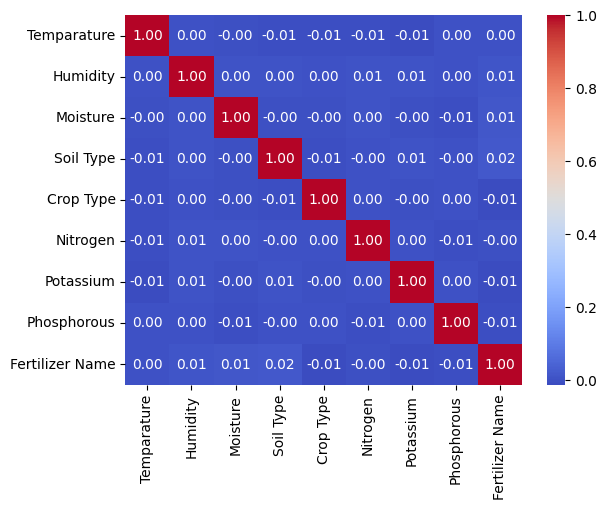

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()



In [19]:
def mapk(actual, predicted, k=3):
    """
    Computes the mean average precision at k.
    `actual` is a list of true labels.
    `predicted` is a list of lists of predicted labels.
    """
    def apk(a, p, k):
        if len(p) > k:
            p = p[:k]
        score = 0.0
        num_hits = 0.0
        for i, pred in enumerate(p):
            if pred == a and pred not in p[:i]:  # correct and not repeated
                num_hits += 1.0
                score += num_hits / (i + 1.0)
        return score

    return sum(apk(a, p, k) for a, p in zip(actual, predicted)) / len(actual)


In [20]:
# Predict class probabilities
val_probs = model.predict_proba(X_test)

# Get top 3 predictions for each sample
top3_preds = val_probs.argsort(axis=1)[:, -3:][:, ::-1]

# Convert to original label encoding (optional)
# If using LabelEncoder for target earlier
top3_labels = top3_preds

# Evaluate using MAP@3
score = mapk(y_test.values, top3_labels.tolist(), k=3)
print(f"📊 MAP@3 score on validation set: {score:.4f}")


📊 MAP@3 score on validation set: 0.3207


In [21]:
top3_labels

array([[4, 3, 2],
       [0, 3, 4],
       [3, 1, 4],
       ...,
       [2, 1, 6],
       [3, 1, 0],
       [3, 0, 1]])

In [22]:
for i, name in enumerate(le.classes_):
    print(f"{i}: {name}")

0: 10-26-26
1: 14-35-14
2: 17-17-17
3: 20-20
4: 28-28
5: DAP
6: Urea


In [23]:
p=pd.read_csv("/kaggle/input/playground-series-s5e6/train.csv")
p["Fertilizer Name"].unique()
p
y

0         4
1         4
2         2
3         0
4         5
         ..
749995    4
749996    2
749997    0
749998    3
749999    6
Name: Fertilizer Name, Length: 750000, dtype: int64

In [24]:
probs = model.predict_proba(X_test)
top3_preds = probs.argsort(axis=1)[:, -3:][:, ::-1]  # top 3 classes

# Map to original fertilizer names
fertilizer_preds = le.inverse_transform(top3_preds.ravel()).reshape(top3_preds.shape)
fertilizer_strings = [' '.join(row) for row in fertilizer_preds]

# Create submission
submission = pd.DataFrame({
    # 'id': X_test['id'],
    'Fertilizer Name': fertilizer_strings
})
submission.to_csv("submission.csv", index=False)

In [25]:
submission

,Fertilizer Name
0,28-28 20-20 17-17-17
1,10-26-26 20-20 28-28
2,20-20 14-35-14 28-28
3,20-20 14-35-14 17-17-17
4,17-17-17 14-35-14 10-26-26
...,...
149995,10-26-26 Urea 17-17-17
149996,17-17-17 28-28 10-26-26
149997,17-17-17 14-35-14 Urea
149998,20-20 14-35-14 10-26-26


In [26]:
Xtest=pd.read_csv("/kaggle/input/playground-series-s5e6/test.csv")
id=Xtest['id']
print(Xtest)
Xtest=Xtest.drop('id',axis=1)
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

Xtest["Crop Type"]=le.fit_transform(Xtest["Crop Type"])
Xtest["Soil Type"]=le.fit_transform(Xtest["Soil Type"])
# df["Fertilizer Name"]=le.fit_transform(df["Fertilizer Name"])

# df.head()
# df.shape

# X=df.drop("Fertilizer Name",axis=1)
# y=df["Fertilizer Name"]
# X,y
Xtest


            id  Temparature  Humidity  Moisture Soil Type    Crop Type  \
0       750000           31        70        52     Sandy        Wheat   
1       750001           27        62        45       Red    Sugarcane   
2       750002           28        72        28    Clayey  Ground Nuts   
3       750003           37        53        57     Black  Ground Nuts   
4       750004           31        55        32       Red       Pulses   
...        ...          ...       ...       ...       ...          ...   
249995  999995           26        66        30       Red    Sugarcane   
249996  999996           33        62        55       Red       Pulses   
249997  999997           36        53        64     Black        Paddy   
249998  999998           36        67        26    Clayey        Paddy   
249999  999999           35        63        36    Clayey  Ground Nuts   

        Nitrogen  Potassium  Phosphorous  
0             34         11           24  
1             30         

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,31,70,52,4,10,34,11,24
1,27,62,45,3,8,30,14,15
2,28,72,28,1,2,14,15,4
3,37,53,57,0,2,18,17,36
4,31,55,32,3,7,13,19,14
...,...,...,...,...,...,...,...,...
249995,26,66,30,3,8,14,7,18
249996,33,62,55,3,7,28,14,7
249997,36,53,64,0,6,28,11,27
249998,36,67,26,1,6,33,0,10


In [27]:
dff=pd.read_csv("/kaggle/input/playground-series-s5e6/train.csv")
dff
dff["Fertilizer Name"]=le.fit_transform(dff["Fertilizer Name"])
dff

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,4
1,1,27,69,65,Sandy,Millets,30,6,18,4
2,2,29,63,32,Sandy,Millets,24,12,16,2
3,3,35,62,54,Sandy,Barley,39,12,4,0
4,4,35,58,43,Red,Paddy,37,2,16,5
...,...,...,...,...,...,...,...,...,...,...
749995,749995,25,69,30,Clayey,Maize,8,16,6,4
749996,749996,37,64,58,Loamy,Sugarcane,38,8,20,2
749997,749997,35,68,59,Sandy,Ground Nuts,6,11,29,0
749998,749998,31,68,29,Red,Cotton,9,11,12,3


In [28]:

probs = model.predict_proba(Xtest)
top3_preds = probs.argsort(axis=1)[:, -3:][:, ::-1]  # top 3 classes

# Map to original fertilizer names
fertilizer_preds = le.inverse_transform(top3_preds.ravel()).reshape(top3_preds.shape)
fertilizer_strings = [' '.join(row) for row in fertilizer_preds]

# Create submission
submission = pd.DataFrame({
    'id': id,
    'Fertilizer Name': fertilizer_strings
})
submission.to_csv("submission.csv", index=False)

In [29]:
submit=pd.read_csv("/kaggle/working/submission.csv")
x=submit
x

,id,Fertilizer Name
0,750000,DAP 28-28 14-35-14
1,750001,17-17-17 20-20 10-26-26
2,750002,10-26-26 20-20 14-35-14
3,750003,14-35-14 10-26-26 17-17-17
4,750004,20-20 10-26-26 17-17-17
...,...,...
249995,999995,17-17-17 20-20 14-35-14
249996,999996,14-35-14 20-20 10-26-26
249997,999997,14-35-14 28-28 DAP
249998,999998,10-26-26 28-28 DAP


In [30]:
q=pd.read_csv("/kaggle/working/submission.csv")
x=q
q

,id,Fertilizer Name
0,750000,DAP 28-28 14-35-14
1,750001,17-17-17 20-20 10-26-26
2,750002,10-26-26 20-20 14-35-14
3,750003,14-35-14 10-26-26 17-17-17
4,750004,20-20 10-26-26 17-17-17
...,...,...
249995,999995,17-17-17 20-20 14-35-14
249996,999996,14-35-14 20-20 10-26-26
249997,999997,14-35-14 28-28 DAP
249998,999998,10-26-26 28-28 DAP
